In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("accident_info.csv")

In [3]:
df.shape

(425, 11)

In [4]:
df.head()

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [5]:
df.Description[3]

'Being 9:45 am. approximately in the Nv. 1880 CX-695 OB7, the personnel begins the task of unlocking the Soquet bolts of the BHB machine, when they were in the penultimate bolt they identified that the hexagonal head was worn, proceeding Mr. Cristóbal - Auxiliary assistant to climb to the platform to exert pressure with your hand on the "DADO" key, to prevent it from coming out of the bolt; in those moments two collaborators rotate with the lever in anti-clockwise direction, leaving the key of the bolt, hitting the palm of the left hand, causing the injury.'

In [6]:
df.groupby('Industry Sector').count()

,Unnamed: 0,Data,Countries,Local,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
Industry Sector,,,,,,,,,,
Metals,134,134,134,134,134,134,134,134,134,134
Mining,241,241,241,241,241,241,241,241,241,241
Others,50,50,50,50,50,50,50,50,50,50


In [7]:
df.Description.head()

0    While removing the drill rod of the Jumbo 08 f...
1    During the activation of a sodium sulphide pum...
2    In the sub-station MILPO located at level +170...
3    Being 9:45 am. approximately in the Nv. 1880 C...
4    Approximately at 11:45 a.m. in circumstances t...
Name: Description, dtype: object

In [8]:
import pre_processor as pp

[nltk_data] Downloading package wordnet to /Users/chethee/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chethee/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
import model_efficiency as me

In [10]:
prepare_data = pp.pre_process_data()

In [11]:
#df['processed'] = prepare_data.pre_process(df.Description,1,1,1,1,1,1,1)
df['modified_description'] = prepare_data.pre_process(df.Description,                    
                                                        lower_flag=1, 
                                                        remove_spaces_flag=1, 
                                                        remove_new_line_flag=1,
                                                        remove_special_char_flag=1,  
                                                        remove_single_letter_word_flag=1,
                                                        remove_two_letter_word_flag=1,
                                                        remove_numbers_flag=1,  
                                                        remove_stop_words_flag=1,  
                                                        replace_appos_flag=1,
                                                        lemmatize_the_words_flag=0, 
                                                        stem_the_words_flag=0)

In [12]:
df['modified_description'][1]

'activation sodium sulphide pump piping uncoupled sulfide solution designed area reach maid immediately made use emergency shower directed ambulatory doctor later hospital note sulphide solution grams liter'

In [13]:
df['Description'][1]

'During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter.'

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2

In [15]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import GridSearchCV

In [18]:
df['Potential Accident Level'].head()

0     IV
1     IV
2    III
3      I
4     IV
Name: Potential Accident Level, dtype: object

In [19]:
df['Potential Accident Level'].unique()

array(['IV', 'III', 'I', 'II', 'V', 'VI'], dtype=object)

In [20]:
df['PAL_label'] = df['Potential Accident Level'].replace({'I' :0, 'II':1, 'III':2, 'IV':3, 'V':4, 'VI':4})

In [21]:
df.PAL_label.unique()

array([3, 2, 0, 1, 4])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df.modified_description.values, df.PAL_label.values, test_size=0.2, random_state=0)

In [23]:
print('training dataset length: {}'.format(X_train.shape[0]))
print('test dataset length: {}'.format(X_test.shape[0]))

training dataset length: 340
test dataset length: 85


In [24]:
vectorizer = TfidfVectorizer(stop_words='english')
vectorizer.fit(X_train)

TfidfVectorizer(stop_words='english')

In [25]:
X_train_tfidf = vectorizer.transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
X_train_tfidf, X_test_tfidf

(<340x2618 sparse matrix of type '<class 'numpy.float64'>'
 	with 9355 stored elements in Compressed Sparse Row format>,
 <85x2618 sparse matrix of type '<class 'numpy.float64'>'
 	with 1997 stored elements in Compressed Sparse Row format>)

In [26]:
ch2 = SelectKBest(chi2, k=1000)

ch2.fit(X_train_tfidf, y_train)


SelectKBest(k=1000, score_func=<function chi2 at 0x7ffa1c5431f0>)

In [27]:
X_train_chi = ch2.transform(X_train_tfidf)
X_test_chi = ch2.transform(X_test_tfidf)


In [28]:
X_train_chi, X_test_chi

(<340x1000 sparse matrix of type '<class 'numpy.float64'>'
 	with 3886 stored elements in Compressed Sparse Row format>,
 <85x1000 sparse matrix of type '<class 'numpy.float64'>'
 	with 880 stored elements in Compressed Sparse Row format>)

### Model 1 Naive Bayes

In [29]:
nb_clf = MultinomialNB()
nb_clf.fit(X_train_chi, y_train)
pred = nb_clf.predict(X_test_chi)
print(accuracy_score(y_test, pred))

0.35294117647058826


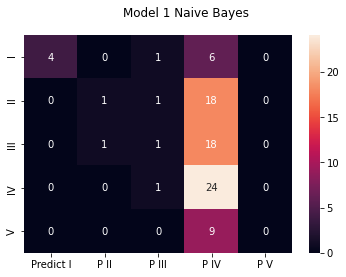

In [30]:
me.fn_confusion_matrix(title="Model 1 Naive Bayes",y_test=y_test, y_predict=pred)

In [31]:
y_test_lbl=pd.DataFrame(y_test).replace({0:'I', 1:'II', 2:'III', 3:'IV', 4:'V'})
pred=pd.DataFrame(pred).replace({0:'I', 1:'II', 2:'III', 3:'IV', 4:'V'})

In [32]:
print(classification_report(y_test_lbl,pred))

              precision    recall  f1-score   support

           I       1.00      0.36      0.53        11
          II       0.50      0.05      0.09        20
         III       0.25      0.05      0.08        20
          IV       0.32      0.96      0.48        25
           V       0.00      0.00      0.00         9

    accuracy                           0.35        85
   macro avg       0.41      0.28      0.24        85
weighted avg       0.40      0.35      0.25        85



/Users/chethee/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Model 2 Logistic Regression

In [45]:
lr_clf=LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr_clf.fit(X_train_chi,y_train)

LogisticRegression(multi_class='multinomial')

In [34]:
pred = lr_clf.predict(X_test_chi)
print(accuracy_score(y_test, pred))

0.3764705882352941


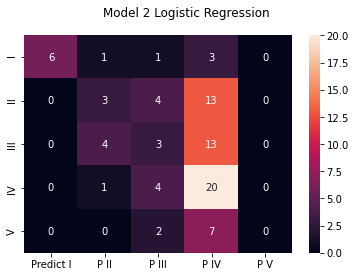

In [35]:
me.fn_confusion_matrix(title="Model 2 Logistic Regression",y_test=y_test, y_predict= pred)

In [36]:
y_test_lbl=pd.DataFrame(y_test).replace({0:'I', 1:'II', 2:'III', 3:'IV', 4:'V'})
pred=pd.DataFrame(pred).replace({0:'I', 1:'II', 2:'III', 3:'IV', 4:'V'})

In [37]:
print(classification_report(y_test_lbl,pred))

              precision    recall  f1-score   support

           I       1.00      0.55      0.71        11
          II       0.33      0.15      0.21        20
         III       0.21      0.15      0.18        20
          IV       0.36      0.80      0.49        25
           V       0.00      0.00      0.00         9

    accuracy                           0.38        85
   macro avg       0.38      0.33      0.32        85
weighted avg       0.36      0.38      0.33        85



/Users/chethee/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Model 3: SVM

In [38]:
pipe_svc = Pipeline([ ('svc', SVC())]) 
param_grid = {'svc__C': [10,100], 'svc__gamma': [0.075, 0.25, 0.1], 'svc__kernel':['linear'], 'svc__probability':[True]} 
samples = 4  # number of random samples 
gridCV = GridSearchCV(pipe_svc, param_grid=param_grid, cv=5, n_jobs=3)
gridCV.fit(X_train_chi,y_train)

GridSearchCV(cv=5, estimator=Pipeline(steps=[('svc', SVC())]), n_jobs=3,
             param_grid={'svc__C': [10, 100], 'svc__gamma': [0.075, 0.25, 0.1],
                         'svc__kernel': ['linear'],
                         'svc__probability': [True]})

In [39]:
print(" Best cross-validation accuracy: {:.2f}". format( gridCV.best_score_)) 
print(" Best parameters: ", gridCV.best_params_) 

 Best cross-validation accuracy: 0.55
 Best parameters:  {'svc__C': 10, 'svc__gamma': 0.075, 'svc__kernel': 'linear', 'svc__probability': True}


In [40]:
print(" Test set accuracy: {:.2f}". format( gridCV.score( X_test_chi, y_test)))

 Test set accuracy: 0.45


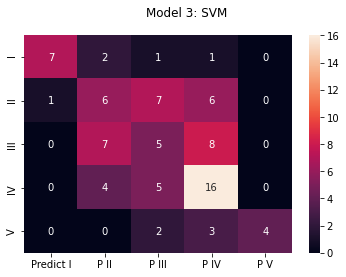

In [41]:
pred = gridCV.predict(X_test_chi)
me.fn_confusion_matrix(title="Model 3: SVM",y_test=y_test, y_predict= pred)

In [42]:
y_test_lbl=pd.DataFrame(y_test).replace({0:'I', 1:'II', 2:'III', 3:'IV', 4:'V'})
pred=pd.DataFrame(pred).replace({0:'I', 1:'II', 2:'III', 3:'IV', 4:'V'})

In [43]:
print(classification_report(y_test_lbl,pred))

              precision    recall  f1-score   support

           I       0.88      0.64      0.74        11
          II       0.32      0.30      0.31        20
         III       0.25      0.25      0.25        20
          IV       0.47      0.64      0.54        25
           V       1.00      0.44      0.62         9

    accuracy                           0.45        85
   macro avg       0.58      0.45      0.49        85
weighted avg       0.49      0.45      0.45        85

